In [ ]:
# https://drive.google.com/file/d/1l_z4q16ggTL4beaXVhPuw8IT_zjhgq5d/view

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/people.csv')
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [5]:
df.shape

(14999, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.rename(columns={'timeSpent.company':'Time Spent in company'}, inplace=True)

In [8]:
df.duplicated().sum()

np.int64(3008)

In [9]:
df=df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.isnull().sum()

,0
satisfactoryLevel,0
lastEvaluation,0
numberOfProjects,0
avgMonthlyHours,0
Time Spent in company,0
workAccident,0
left,0
promotionInLast5years,0
dept,0
salary,0


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])
    print(f'columns:{i}')
    print('Original ---> Encoded')
    for original_class, encoded_value in zip(le.classes_, le.transform(le.classes_)):
      print(f'{original_class} ---> {encoded_value}')
    print()

columns:dept
Original ---> Encoded
IT ---> 0
RandD ---> 1
accounting ---> 2
hr ---> 3
management ---> 4
marketing ---> 5
product_mng ---> 6
sales ---> 7
support ---> 8
technical ---> 9

columns:salary
Original ---> Encoded
high ---> 0
low ---> 1
medium ---> 2



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      11991 non-null  float64
 1   lastEvaluation         11991 non-null  float64
 2   numberOfProjects       11991 non-null  int64  
 3   avgMonthlyHours        11991 non-null  int64  
 4   Time Spent in company  11991 non-null  int64  
 5   workAccident           11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotionInLast5years  11991 non-null  int64  
 8   dept                   11991 non-null  int64  
 9   salary                 11991 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.0 MB


**Statistical Analysis**

In [15]:
# 1. Check using test that satisfactorylevel column is normally distributed.

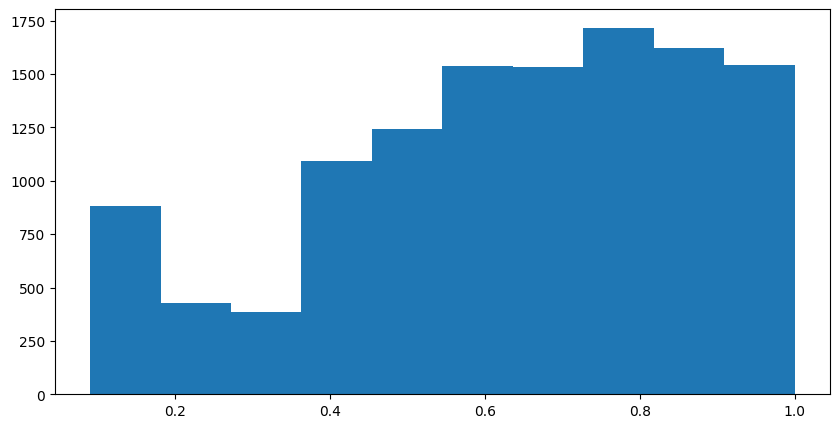

In [16]:
# Logic: bell shaped curve - got by calculating standard deviation
#Visualise the satisfactoryLevel
plt.figure(figsize=(10,5))
plt.hist(df['satisfactoryLevel'])
plt.show() #not a bell curve

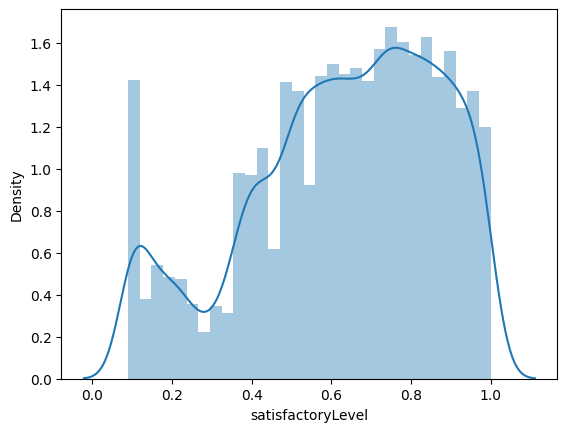

In [17]:
#using seaborn
sns.distplot(df['satisfactoryLevel'])
plt.show() #again doesnt give a bell curve

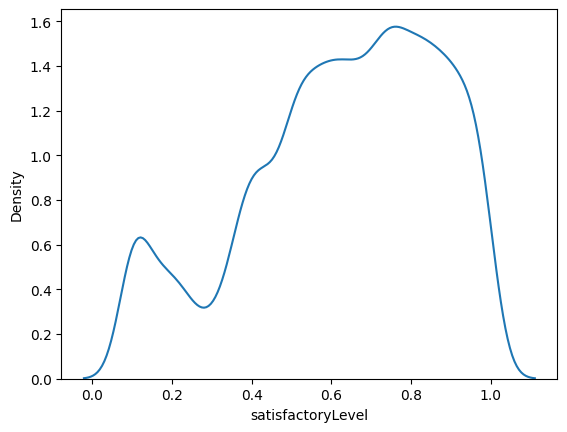

In [18]:
#checking using KDE
sns.kdeplot(x='satisfactoryLevel',data=df)
plt.show() #not bell curve

**Using Shapiro-Wilk Test**

In [19]:
from scipy.stats import shapiro

framing the hypothesis:

Null: The data is normally distributed

Alternate: The data is not Normally Distributed

In [20]:
#performing test
stats,p_value=shapiro(df['satisfactoryLevel'])
p_value

np.float64(6.698511499093979e-52)

In [21]:
#results
if p_value > 0.05:
  print('Fail to reject null hypothesis. The data is normally distributed')
else:
  print('Reject Null Hypothesis. The data is not normally distributed')

Reject Null Hypothesis. The data is not normally distributed


**2. Is the average monthly hours of a employee having experience of 2 -5 years the same as that for employee having experience of 6-10 years?**

In [24]:
2 sample t test

# Null hypothesis: mean avg monthly hours of an employee of experience 2-5 years is the same as 6-10 hours.
# Alternate hypothesis: mean avg monthly hours of an employee of experience 2-5 years is not same as 6-10 hours.

In [26]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'Time Spent in company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [27]:
new_df1=df[(df['Time Spent in company']>=2) & (df['Time Spent in company']<=5)]
new_df2=df[(df['Time Spent in company']>=6) & (df['Time Spent in company']<=10)]

In [28]:
#sampling
sample1=new_df1.sample(200,random_state=0)
sample2=new_df2.sample(200,random_state=0)

In [29]:
sample1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,Time Spent in company,workAccident,left,promotionInLast5years,dept,salary
11858,0.72,0.69,3,270,4,0,0,0,9,1
1857,0.76,0.40,2,122,5,0,0,0,7,1
14837,0.70,0.47,2,238,3,0,0,0,9,1
12029,0.74,0.37,6,200,3,0,0,0,6,1
13101,0.90,0.49,4,185,2,0,0,0,7,1


In [30]:
sample2.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,Time Spent in company,workAccident,left,promotionInLast5years,dept,salary
1433,0.42,0.96,3,270,6,0,0,0,8,1
396,0.77,0.98,5,259,6,0,1,0,6,1
132,0.87,0.90,5,254,6,0,1,0,8,1
6802,0.97,0.96,4,250,6,0,0,0,1,2
14893,0.72,0.45,4,143,6,0,0,0,6,2


In [31]:
from scipy.stats import ttest_ind

In [33]:
stats,p_value=ttest_ind(sample1['avgMonthlyHours'],sample2['avgMonthlyHours'])
p_value

np.float64(0.9530058909644643)

In [36]:
if p_value >0.05:
  print('Fail to reject null hypothesis. The average monthly hours of a employee having experience of 2 -5 years is the same as that for employee having experience of 6-10 years')
else:
  print('Reject null hypothesis.The average monthly hours of a employee having experience of 2 -5 years is NOT the same as that for employee having experience of 6-10 years')

Fail to reject null hypothesis. The average monthly hours of a employee having experience of 2 -5 years is the same as that for employee having experience of 6-10 years
